Optimal theta found: 0.8708880897103073
Probability of class 1 for x=0: 0.158
Probability of class 1 for x=1: 0.876


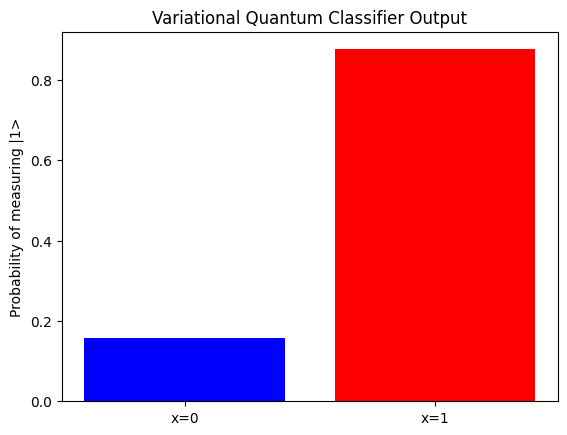

In [8]:
# Qiskit Variational Quantum Classifier with One Qubit

# x = 0 -> class 0
# x = 1 -> class 1

# External dependencies
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
#from qiskit.providers.aer import AerSimulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.optimize import minimize


import warnings
warnings.filterwarnings('ignore')


# Quantum classifier circuit with trainable parameter
def variational_quantum_classifier(theta):
    circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

    # Trainable rotation (theta is the parameter)
    circuit.ry(float(theta), 0)  

    # Measurement
    circuit.measure(0, 0)

    # Run the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1000).result()
    counts = result.get_counts()

    # Probability of measuring state |1>
    prob_1 = counts.get('1', 0) / 1000
    return prob_1


# Cost function to be optimized
def cost_function(theta):
    loss_0 = (variational_quantum_classifier(theta) - 0)**2  # x = 0 should output class 0
    loss_1 = (variational_quantum_classifier(theta + np.pi/2) - 1)**2  # x = 1 should output class 1
    return loss_0 + loss_1  # Total loss


# Training the model (finding optimal theta)
initial_theta = np.random.rand()  # Random start
result = minimize(cost_function, initial_theta, method='COBYLA')

optimal_theta = result.x[0]
print(f"Optimal theta found: {optimal_theta}")

# Testing the trained model
prob_0 = variational_quantum_classifier(optimal_theta)
prob_1 = variational_quantum_classifier(optimal_theta + np.pi/2)

print(f"Probability of class 1 for x=0: {prob_0}")
print(f"Probability of class 1 for x=1: {prob_1}")

# Plots
plt.bar(["x=0", "x=1"], [prob_0, prob_1], color=['blue', 'red'])
plt.ylabel("Probability of measuring |1>")
plt.title("Variational Quantum Classifier Output")
plt.show()
